In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')

In [6]:
import LSSutils.lab as lab
from LSSutils.catalogs.combinefits import reassignment

In [7]:
import fitsio as ft

In [32]:
mock_path = '/B/Shared/mehdi/eboss/mocks/NGC_0009_contaminated/EZmock_eBOSS_QSO_NGC_v7_0.2_plain_lowmid_0009.dat.fits'
mock = ft.read(mock_path)
random = ft.read(mock_path.replace('.dat.', '.ran.'))

In [33]:
good = mock['WEIGHT_SYSTOT'] < 2
print((~good).sum(), (~good).mean())

3 1.3664313368253245e-05


In [12]:
mock = mock[good]

In [13]:
random_good = reassignment(random, mock)

In [16]:
!mkdir /B/Shared/mehdi/eboss/mocks/NGC_0009_contaminated/test_wsys

In [17]:
random_good.write('/B/Shared/mehdi/eboss/mocks/NGC_0009_contaminated/test_wsys/randoms.fits')

In [18]:
ft.write('/B/Shared/mehdi/eboss/mocks/NGC_0009_contaminated/test_wsys/mocks.fits', mock)

In [19]:
mock['WEIGHT_SYSTOT'].min(), mock['WEIGHT_SYSTOT'].max()

(0.7458633057982792, 1.8539201989925385)

run nbodykit

In [28]:
path = '/B/Shared/mehdi/eboss/mocks/NGC_0009_contaminated/'
pathn = '/B/Shared/mehdi/eboss/mocks/NGC_0009_null/'

# --- 
pk_fix = lab.io.readnbodykit(f'{path}test_wsys/pk_9_plain2z.txt')
pk = lab.io.readnbodykit(f'{path}pk_QSO_NGC_v7_0.2_plain_lowmid_0009_contaminated_512_standard.txt')
pk_null = lab.io.readnbodykit(f'{pathn}pk_QSO_NGC_v7_0.2_known_lowmid_0009_null_512_standard.txt')

In [29]:
pk[1], pk_fix[1]

(176230.90452566024, 65210.00930758373)

In [25]:
import matplotlib.pyplot as plt

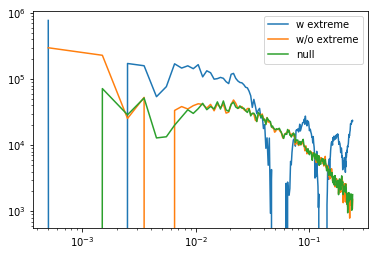

In [31]:
for pki, label in zip([pk, pk_fix, pk_null], ['w extreme', 'w/o extreme', 'null']):
    plt.loglog(pki[0][:,0], pki[0][:, 2]-pki[1], label=label)
plt.legend()